# Time Series Analysis using Statsmodels

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.size'] = 20

## Data

In [3]:
# Load data
data = sm.datasets.macrodata.load_pandas().data
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [4]:
data.index = pd.Index(
    sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')
)

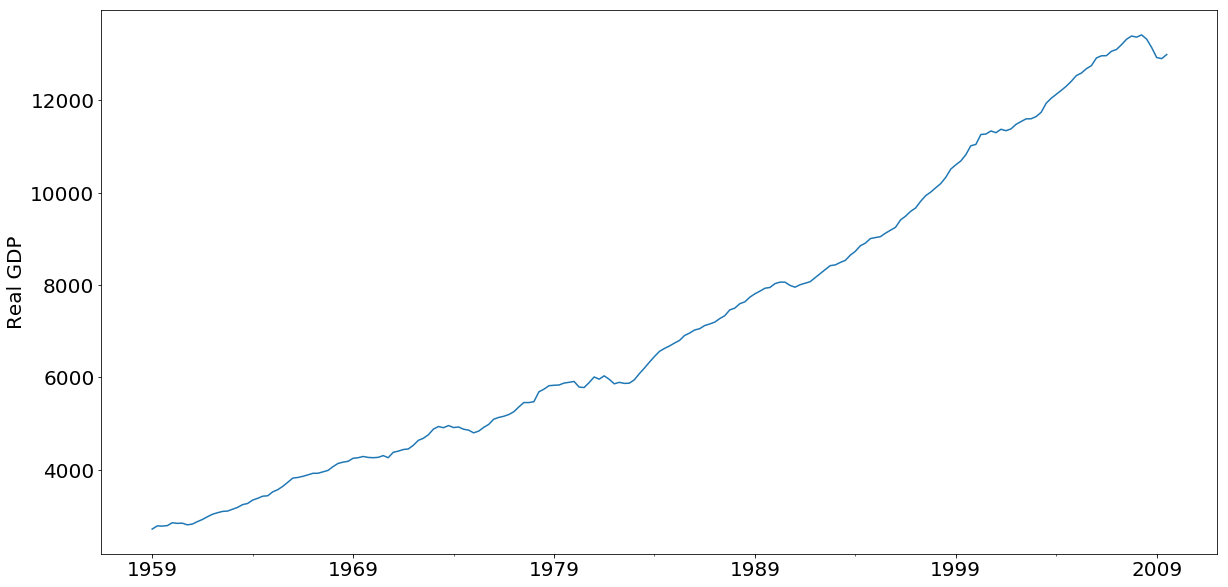

In [6]:
data['realgdp'].plot(
    figsize=(20, 10),
)

plt.ylabel('Real GDP');

## Getting the Trend

Using [**Hodrick-Prescott filter**](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter).

It separates a time-series $ y_t $ into a trend $ \tau_t $ and a cyclical component $ \zeta_t $, i.e.:

$ y_t = \tau_t + \zeta_t $

The components are determined by minimizing the following quadratic loss function:

$ \min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2} $

In [7]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(data.realgdp)

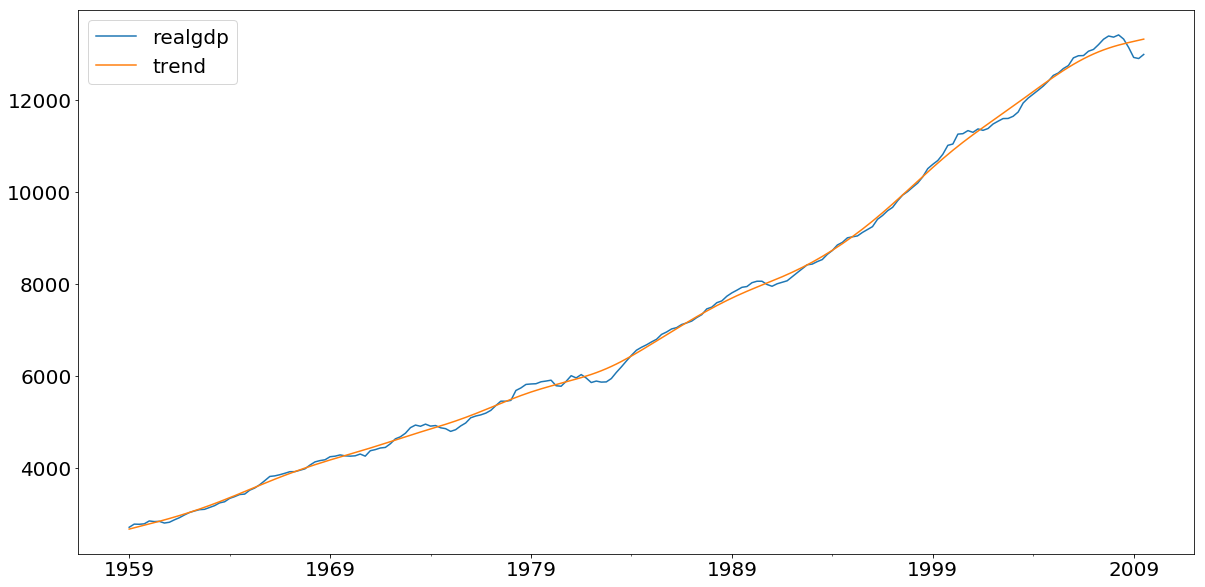

In [8]:
data['trend'] = gdp_trend

data[[
    'realgdp',
    'trend'
]].plot(figsize=(20, 10))

plt.legend();